## 1 The Philosophy of Bayesian Inference - NOTES

### 1.1 Introduction

Bayesian inference is simply updating your beliefs after considering new evidence. A Bayesian can rarely be certain about a result, but can be very confident.

_note_: Inference - a conclusion reached on the basis of evidence and reasoning.

Bayesian inference differs from more traditional statistical inference by preserving uncertainty. Bayesians interpret a probability as the measure of belief, or confidence, in an event occurring. Assigning 0 to an event believes with absolute certainty that the event won't occur; assigning a belief of 1 implies that certain that event will occur. Beliefs between 0 and 1 allow for weightings of other outcomes.

To align ourselves with traditional probability notation, we denote our belief about event A as P(A) - __prior probability__. Updated belief is denoted as P(A|X), interpreted as the probability of A given the evidence X - __posterior probability__.

1. $P(A): \;\;$ The coin has a 50 percent chance of being Heads. $P(A | X):\;\;$ You look at the coin, observe a Heads has landed, denote this information $X$, and trivially assign probability 1.0 to Heads and 0.0 to Tails.

2.  $P(A): \;\;$ This big, complex code likely has a bug in it. $P(A | X): \;\;$ The code passed all $X$ tests; there still might be a bug, but its presence is less likely now.

3.  $P(A):\;\;$ The patient could have any number of diseases. $P(A | X):\;\;$ Performing a blood test generated evidence $X$, ruling out some of the possible diseases from consideration.

By introducing prior uncertainty about events, we are already admitting that any guess we make is potentially very wrong. After observing data, evidence, or other information, we update our beliefs, and our guess becomes less wrong.

The frequentist inference function would return a number, representing an estimate, whereas the Bayesian function would return probabilities. 

Denote N as the number of instances of evidence we possess. As we gather an infinite amount of evidence, $N \rightarrow \infty$, Bayesian result (often) align with frequentist result. For large N, statistical inference is more or less objective. On the other hand, for small N, inference is much more unstable; frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels.

Frequentist methods are still useful or state-of-the-art in many areas. Tools such as least square linear regression, LASSO regression, and expectation-maximization algorithms are all powerful and fast.


### 1.2 Our Bayesian Framework

Bayes' Theorem:

\begin{equation*}
P(A|X) = \frac{P(X|A)(P(A)}{P(X)}
\\ \propto P(X | A) P(A)\;\; (\propto \text{is proportional to })
\end{equation*}

### 1.2.1 Example: Mandatory Coin-Flip

Suppose, naively, that you are unsure about the probability of heads in coin flip. There is a ratio - call it p - but have no prior opinion of what p might be. We begin to flip a coin, and record the observations of either heads or tails. How does our inference of p change change as we observe more and more coin flips? More specifically, what do our posterior probabilities look like when we have little data vs. when we have lots of data.

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import scipy.stats as stats

In [2]:
# beta continuous rv, useful in Bayesian statistics
dist = stats.beta
# number of trials
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
# Bernoulli discrete rv; generating random numbers with rvs
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

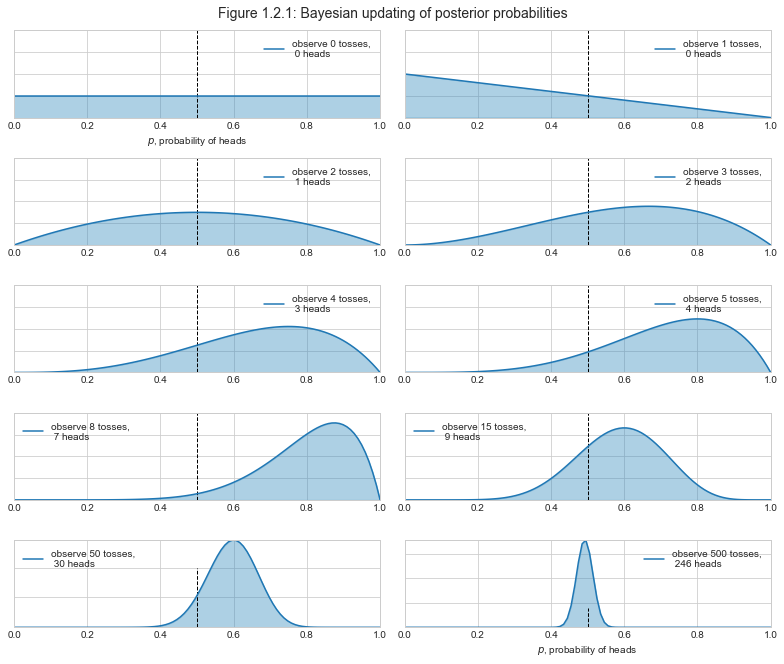

In [3]:
figsize(11, 9)

# For the already prepared, he is using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    # creating subplot axes at the given grid position
    ax = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    # hiding ytickslabels    
    plt.setp(ax.get_yticklabels(), visible=False)
    # counting heads in a given trial
    heads = data[:N].sum()
    # calculating pdf in the given interval
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    # plotting pdf
    plt.plot(x, y, label="observe {0} tosses,\n {1} heads".format(N, heads))
    # filling the area below pdf
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    # adding a vertical line at 0.5
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    # adding legend
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight = True)
    
plt.suptitle("Figure 1.2.1: Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### 1.2.2 Example: Librarian of Farmer?

The example is inspired by the story in Thinking, Fast and Slow by Daniel Kahneman. Given description of a person, decide if the person a farmer or librarian.

Suppose we have two professions - librarians and farmers. The ratio of male farmers to male librarians is 20:1.

Let A denote the event that Steve is a librarian: $P(A)$ = 1/21 = 0.047

Let's define $P(X|A)$ as the probability the neighbor's description given Steve is a librarian. Let's say 95%, or 0.95.

Next is $P(X)$, chance of anyone being described in the way the neighbor described Steve. 

\begin{equation*}
P(X) = P(X \text{ and } A) + P(X \text{ and } \sim A) = P(X|A)P(A) + P(X | \sim A)P(\sim A)
\end{equation*}

$\sim A$ - Steve is not a librarian, and thus is a farmer. $P(\sim A) = 1 - P(A)$ = 20/21. Let's say $P(X| \sim A)$ = 0.5.

Thus $P(X)$ = 0.95 * (1/21) + (0.5) * (20/21) = 0.52. Combining everything:

\begin{equation*}
P(A) = \frac{0.95 \cdot 1/21}{0.52} = 0.087
\end{equation*}

Comparing prior and posterior probabilities of Steve being a librarian and Steve being a farmer:

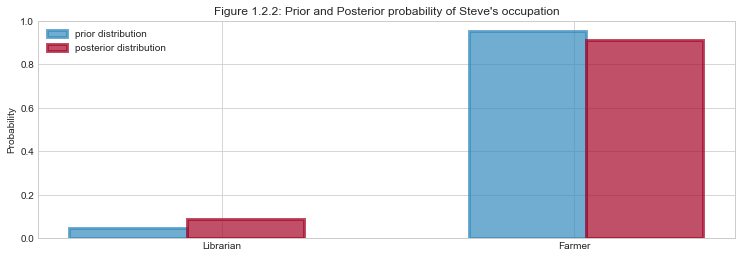

In [4]:
figsize(12.5, 4)

colors = ["#348ABD", "#A60628"]
prior = [1/21., 20/21.]
posterior = [0.087, 1 - 0.087]

plt.bar([0, 0.85], prior, alpha=0.7, width=0.25,
        color = colors[0], label='prior distribution',
        lw='3', edgecolor=colors[0])

plt.bar([0 + 0.25, 0.85 + 0.25], posterior, alpha=0.7,
        width=0.25, color=colors[1],
        label="posterior distribution",
        lw="3", edgecolor=colors[1])

plt.xticks([0.20, .95], ['Librarian', 'Farmer'])
plt.title("Figure 1.2.2: Prior and Posterior probability of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left");

After we observed X, the probability of Steve being a librarian increased. This was a very simple example of Bayesian inference and Bayes' rule.

### 1.3 Probability Distributions

Let Z be some random variable. Then associated with Z is a probability density function that assigns probabilities to the different outcomes Z can take.

We can divide random variables in three categories:

 * Discrete - population, movie ratings, number of votes.
 * Continuous - temperature, speed, time.
 * Mixed - combination of the above two.
 
### 1.3.1 Discrete Case

If Z is discrete, then its distribution is called a __probability mass function__, which measures the probability that Z takes on the value k, denoted $P(Z = k)$. We say Z is __Poisson__-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. It also can be described as the intensity of the Poisson distribution.

If a random variable Z has a Poisson mass distribution, we denote this by writing $Z \sim Poi(\lambda)$. One useful property of the Poisson distribution is that its expected value is equal to its parameter. That is, $E[Z|\lambda] = \lambda$

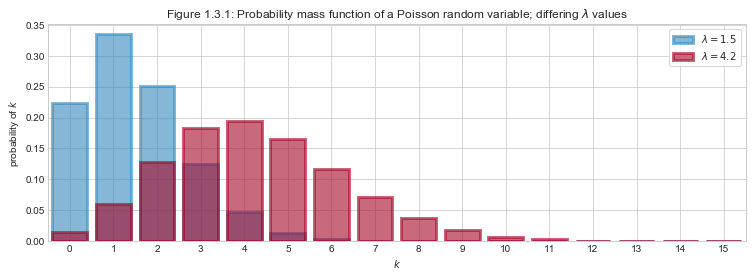

In [5]:
figsize(12.5, 4)

a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ['#348ABD', '#A60628']

plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
        label='$\lambda = {0:.1f}$'.format(lambda_[0]), alpha=0.60,
        edgecolor=colors[0], lw='3')

plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
        label='$\lambda = {0:.1f}$'.format(lambda_[1]), alpha=0.60,
        edgecolor=colors[1], lw='3')

plt.xticks(a, a)
plt.xlim(a.min() - 0.5, a.max() + 0.5)
plt.legend(frameon=True)
plt.ylabel('probability of $k$')
plt.xlabel('$k$')
plt.title('Figure 1.3.1: Probability mass function of a Poisson random variable; differing $\lambda$ values');

### 1.3.2 Continuous Case

A continuous random variable has a __probability density function__. An example of continuous random variable is a random variable with __exponential density__.

$$ f_Z(z|\lambda) = \lambda e^{-\lambda z}, z \geq 0 $$

Like Poisson rv, and exponential rv can take only non-negative values.But unlike Poisson rv, the exponential can take any non-negative values, including non-integral values such as 4.25, 5.612401.

When a random variable Z has an exponential distribution with parameter $\lambda$, we say Z is exponential and write $Z \sim Exp(\lambda)$. Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$ - $E[Z|\lambda] = \frac{1}{\lambda}$.

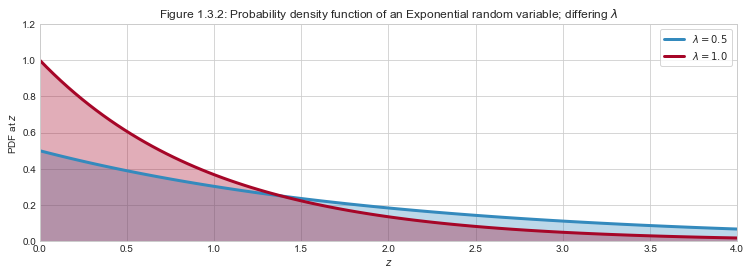

In [7]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale = 1./l), lw=3,
             color=c, label='$\lambda = {0:.1f}$'.format(l))
    plt.fill_between(a, expo.pdf(a, scale = 1./l), color=c, alpha=0.33)
    
plt.legend(frameon=True)
plt.ylabel('PDF at $z$')
plt.xlabel('$z$')
plt.xlim(0, 4)
plt.ylim(0, 1.2)
plt.title('Figure 1.3.2: Probability density function of an Exponential random variable; differing $\lambda$');    

### 1.3.3 But What is $\lambda$?

In the real world $\lambda$ is hidden from us. We see only Z, and must work backward to try to determine $\lambda$. Bayesian interference is concerned with beliefs about what $\lambda$ might be.

### 1.4 Using Computers to Perform Bayesian Interference for Us

### 1.4.1 Example: Inferring Behavior from Text-Message Data

Given a series of daily text-message counts from user, check if text-messaging habits have changed over time.

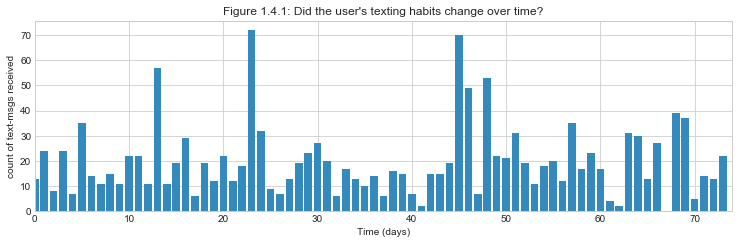

In [8]:
figsize(12.5, 3.5)
count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)

plt.bar(np.arange(n_count_data), count_data, color='#348ABD')

plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs received')
plt.title("Figure 1.4.1: Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);